## Chargement des librairies

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from itertools import chain, combinations


In [180]:
def primary_key_test(df,cols):
    n = len(df.index)
    for i in cols:
        if len(df[i].drop_duplicates().index) == n:
            print("Jointure possible sur la clé ",i," .".format(i))
        else :
            print("L'identifiant ",i," presente des erreurs d'unicité.".format(i))
            isnullcount = df[i].isnull().sum()
            if(isnullcount != 0):
                print('cette cle comporte des données nulles')
    print("Le dataframe a "+ str(df.shape[0]) + " ligne et " + str(df.shape[1]) + " colonnes")  

In [181]:
erp_file = pd.read_excel('erp.xlsx')
cols = ['product_id']
primary_key_test(erp_file,cols)

Jointure possible sur la clé  product_id  .
Le dataframe a 825 ligne et 5 colonnes


In [182]:
liaison_file = pd.read_excel('liaison.xlsx')
cols = ['product_id','id_web']
primary_key_test(liaison_file,cols)

Jointure possible sur la clé  product_id  .
L'identifiant  id_web  presente des erreurs d'unicité.
cette cle comporte des données nulles
Le dataframe a 825 ligne et 2 colonnes


In [183]:
web_file = pd.read_excel('web.xlsx')
cols = ['sku']
primary_key_test(web_file,cols)

L'identifiant  sku  presente des erreurs d'unicité.
cette cle comporte des données nulles
Le dataframe a 1513 ligne et 28 colonnes


## Lecture de fichier

In [184]:
erp_file.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [185]:
erp_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


Recherche du nombre de données nulles

In [186]:
print(erp_file.isnull().sum())

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64


In [187]:
erp_file.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.415636,26.496970
std,902.644635,0.337506,26.795849,45.892422
min,3847.000000,0.000000,5.200000,0.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


Recherche des données dupliquées 

In [188]:
erp_file.loc[erp_file.duplicated(keep=False),:]

,product_id,onsale_web,price,stock_quantity,stock_status


In [189]:
erp_file_copy =erp_file.copy()

In [190]:
web_file.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [191]:
web_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

Recherche des données nulles dans le fichier web

In [192]:
print(web_file.isnull().sum())

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64


Recherche des données dupliquées dans le fichier web

In [69]:
web_file.loc[web_file.duplicated(keep=False),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
web_file.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,0.0,0.0,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,4.006993,NaN,1.998601,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.510559,NaN,0.037385,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


In [202]:
web_file.rename(columns={"sku": "id_web"}, inplace=True)
web_file

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


Fichier de liaison

In [194]:
liaison_file.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [195]:
print(liaison_file.isnull().sum())

product_id     0
id_web        91
dtype: int64


In [196]:
liaison_erp_file= pd.merge(liaison_file,erp_file, on='product_id',how='inner')
liaison_erp_file

,product_id,id_web,onsale_web,price,stock_quantity,stock_status
0,3847,15298,1,24.2,0,outofstock
1,3849,15296,1,34.3,0,outofstock
2,3850,15300,1,20.8,0,outofstock
3,4032,19814,1,14.1,0,outofstock
4,4039,19815,1,46.0,0,outofstock
...,...,...,...,...,...,...
820,7203,NaN,0,45.0,30,instock
821,7204,NaN,0,45.0,9,instock
822,7247,13127-1,1,54.8,23,instock
823,7329,14680-1,0,26.5,14,instock


Recherche du nombre de données nulles

In [197]:
print(liaison_erp_file.isnull().sum())

product_id         0
id_web            91
onsale_web         0
price              0
stock_quantity     0
stock_status       0
dtype: int64


Selection des lignes qui ont un id web

In [198]:
erp_file_liaison = liaison_erp_file.loc[~(liaison_erp_file['id_web'].isnull())]
erp_file_liaison

,product_id,id_web,onsale_web,price,stock_quantity,stock_status
0,3847,15298,1,24.2,0,outofstock
1,3849,15296,1,34.3,0,outofstock
2,3850,15300,1,20.8,0,outofstock
3,4032,19814,1,14.1,0,outofstock
4,4039,19815,1,46.0,0,outofstock
...,...,...,...,...,...,...
792,7023,15891,1,27.5,15,instock
793,7025,15887,1,69.0,2,instock
822,7247,13127-1,1,54.8,23,instock
823,7329,14680-1,0,26.5,14,instock


In [199]:
erp_file_liaison.head()

,product_id,id_web,onsale_web,price,stock_quantity,stock_status
0,3847,15298,1,24.2,0,outofstock
1,3849,15296,1,34.3,0,outofstock
2,3850,15300,1,20.8,0,outofstock
3,4032,19814,1,14.1,0,outofstock
4,4039,19815,1,46.0,0,outofstock


In [200]:
erp_file_liaison.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
792    False
793    False
822    False
823    False
824    False
Length: 734, dtype: bool

Extraction des données qui ont un id web

In [203]:
web_file = web_file.loc[~(web_file['id_web'].isnull())]

Jointure entre le fichier erp et le fichier web

In [204]:
erp_web_file = pd.merge(erp_file_liaison,web_file, on='id_web',how='outer',indicator= True)
erp_web_file

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,15298,1,24.2,0,outofstock,0.0,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3847,15298,1,24.2,0,outofstock,0.0,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both
2,3849,15296,1,34.3,0,outofstock,0.0,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,3849,15296,1,34.3,0,outofstock,0.0,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both
4,3850,15300,1,20.8,0,outofstock,0.0,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,7247,13127-1,1,54.8,23,instock,0.0,0.0,0.0,0.0,...,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1444,7247,13127-1,1,54.8,23,instock,0.0,0.0,0.0,0.0,...,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both
1445,7329,14680-1,0,26.5,14,instock,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1446,7338,16230,1,16.3,45,instock,0.0,0.0,0.0,0.0,...,2020-08-13 10:45:03,2020-08-13 08:45:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


Extraction des données dont post type est un produit

In [205]:
final_file = erp_web_file.loc[(erp_web_file['post_type'] == 'product')]
final_file

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,15298,1,24.2,0,outofstock,0.0,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3849,15296,1,34.3,0,outofstock,0.0,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,3850,15300,1,20.8,0,outofstock,0.0,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
6,4032,19814,1,14.1,0,outofstock,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
8,4039,19815,1,46.0,0,outofstock,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,6930,16135,1,8.4,83,instock,0.0,0.0,0.0,0.0,...,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1439,7023,15891,1,27.5,15,instock,0.0,0.0,0.0,0.0,...,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1441,7025,15887,1,69.0,2,instock,0.0,0.0,0.0,0.0,...,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1443,7247,13127-1,1,54.8,23,instock,0.0,0.0,0.0,0.0,...,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [206]:
final_file['ca_par_produits'] =final_file['price']* final_file['total_sales']
final_file

<ipython-input-206-e99b45ceef4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_file['ca_par_produits'] =final_file['price']* final_file['total_sales']


,product_id,id_web,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge,ca_par_produits
0,3847,15298,1,24.2,0,outofstock,0.0,0.0,0.0,0.0,...,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,145.2
2,3849,15296,1,34.3,0,outofstock,0.0,0.0,0.0,0.0,...,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
4,3850,15300,1,20.8,0,outofstock,0.0,0.0,0.0,0.0,...,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
6,4032,19814,1,14.1,0,outofstock,0.0,0.0,0.0,0.0,...,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,42.3
8,4039,19815,1,46.0,0,outofstock,0.0,0.0,0.0,0.0,...,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,6930,16135,1,8.4,83,instock,0.0,0.0,0.0,0.0,...,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,42.0
1439,7023,15891,1,27.5,15,instock,0.0,0.0,0.0,0.0,...,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
1441,7025,15887,1,69.0,2,instock,0.0,0.0,0.0,0.0,...,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
1443,7247,13127-1,1,54.8,23,instock,0.0,0.0,0.0,0.0,...,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0


In [207]:
print('le chiffre d''affaire gobale est:''', final_file['ca_par_produits'].sum())

le chiffre daffaire gobale est: 70568.6


## Recherche des valeurs abberantes

Methode 1 : boite à moustache pour voir si notre data contient des valeurs aberrantes

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

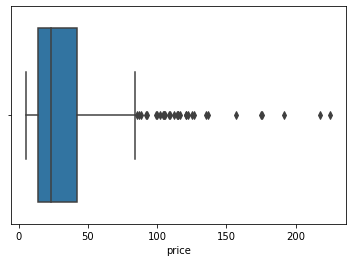

In [219]:
sns.boxplot(final_file['price'])

In [209]:
print(np.where(final_file['price']>88))

(array([ 63,  65, 199, 201, 218, 219, 221, 222, 227, 380, 381, 426, 431,
       432, 437, 502, 511, 553, 587, 602, 603, 604, 642, 647, 648, 653,
       654, 655, 656, 657]),)


Methode 2: zcore

In [210]:
z = np.abs(stats.zscore(final_file['price']))

In [211]:

threshold = 3
# Position of the outlier
outlier = np.where(z > 2)
print('Le nombre d outlier est: ',len(outlier[0]))

Le nombre d outlier est:  30


In [212]:
final_file.describe()

,product_id,onsale_web,price,stock_quantity,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count,ca_par_produits
count,714.000000,714.0,714.000000,714.000000,714.0,714.0,714.0,714.0,714.000000,0.0,714.000000,0.0,0.0,0.0,714.0,714.0,714.0,714.000000
mean,5032.557423,1.0,32.493137,28.746499,0.0,0.0,0.0,0.0,4.012605,NaN,1.998599,NaN,NaN,NaN,0.0,0.0,0.0,98.835574
std,790.510878,0.0,27.810525,48.012608,0.0,0.0,0.0,0.0,8.518183,NaN,0.037424,NaN,NaN,NaN,0.0,0.0,0.0,307.685071
min,3847.000000,1.0,5.200000,0.000000,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0,0.000000
25%,4280.250000,1.0,14.100000,2.000000,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,0.000000
50%,4796.000000,1.0,23.550000,12.000000,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,15.250000
75%,5710.500000,1.0,42.175000,35.000000,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,91.150000
max,7338.000000,1.0,225.000000,578.000000,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,4704.000000


In [213]:
def outlierZed(col):
    mean = np.mean(col)
    std = np.std(col)
    threshold = 2
    outlier = []
    for i in col:
        z = (i-mean)/std
        if z > threshold:
            outlier.append(i)
    print('Le nombre d outlier est :', len(outlier))
    
outlierZed(final_file['price'])

Le nombre d outlier est : 30


In [214]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    borne_superieur = np.quantile(s, 0.75)+(1.5*iqr)
    borne_inferieur = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > borne_superieur:
            f.append(i)
        elif i < borne_inferieur:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'borne_superieur':borne_superieur,
        'borne_inferieur':borne_inferieur,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    
    return(d,f,borne_inferieur,borne_superieur) # les valeurs de retours
number_outlier = outliers(final_file.price)[0]
outlier_values = outliers(final_file.price)[1] 
borne_inferieur = outliers(final_file.price)[2]
borne_superieur = outliers(final_file.price)[3]
print('le nombre d''outilier: ',number_outlier)
print('La valeur des outlier: ',outlier_values)

le nombre doutilier:                     sub     values
0                  IQR  28.075000
1      borne_superieur  84.287500
2      borne_inferieur -28.012500
3         Sum outliers  32.000000
4  percentage outliers   4.481793
La valeur des outlier:  [100.0, 88.4, 225.0, 126.5, 85.6, 176.0, 108.5, 157.0, 104.0, 109.6, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 86.8, 92.0, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0]


Representation graphique

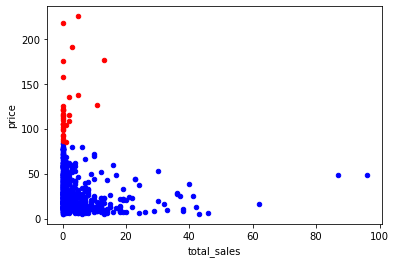

In [215]:
val_ok = final_file[ (final_file['price'] < borne_superieur )  &  (final_file['price'] > borne_inferieur)]
val_non_ok = final_file[ (final_file['price'] > borne_superieur) | (final_file['price'] < borne_inferieur )]
val1 = val_ok.plot(kind= "scatter", x = 10, y = 'price', c = 'blue');
val2 = val_non_ok.plot(kind="scatter", x = 10, y = 'price', c = 'red',ax=val1);

<ipython-input-226-db539514fda2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_file['price'] = np.where(final_file["price"] > borne_superieur,
<ipython-input-226-db539514fda2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_file["price"] = np.where(final_file["price"] < borne_inferieur,
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and 

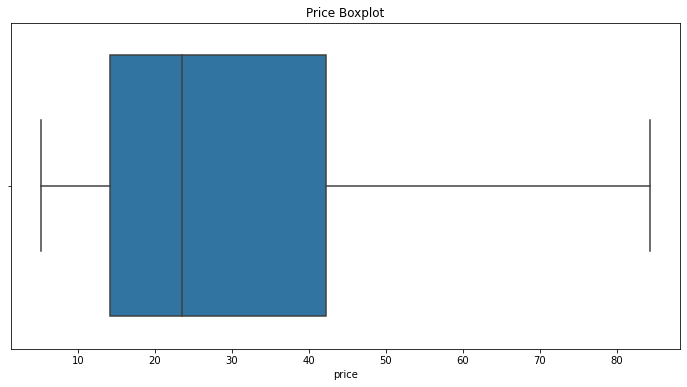

In [226]:
final_file['price'] = np.where(final_file["price"] > borne_superieur,
                               borne_superieur,final_file['price']) #higher
final_file["price"] = np.where(final_file["price"] < borne_inferieur, 
                               borne_inferieur,final_file['price'])
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(final_file.price).set_title('Price Boxplot')